In [2]:
#
#
#  @notebook Ethereum classic price data demo.
#  @auth          z37
#  @code          python.
#  @date          31/03/2020
#
#

In [28]:
'Library packages for the notebook.'

import pandas as pd
from scipy import stats
from scipy.stats import norm
from scipy.stats import lognorm
import os
import seaborn as sns
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import math

%matplotlib inline

* Data entry, ETC-USD price cvs file 
* Ethereum class / USD 

In [4]:
'''If the file is in the same directory that you are working in
you can load it with just the filename. 
use os.gegtcwd() to get the location directory'''

print("file location {}".format(os.getcwd()))

Prices = pd.read_csv("ETC-USD.csv")

file location /home/nbuser/library


### Price Dataframe

In [5]:
Prices.dropna(subset = ["Volume"], inplace=True)

In [6]:
Prices.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2020-03-26,5.023456,5.094900,4.935123,5.078555,5.078555,1.441483e+09
362,2020-03-27,5.080045,5.187206,4.999923,5.020266,5.020266,1.338792e+09
363,2020-03-28,5.017705,5.017705,4.685852,4.809776,4.809776,1.463133e+09
364,2020-03-29,4.809484,5.068387,4.785679,4.842807,4.842807,1.402357e+09
366,2020-03-31,4.964888,4.992444,4.938882,4.959155,4.959155,1.428584e+09


In [7]:
# shape of the dataframe
Prices.shape

(366, 7)

In [8]:
# type of data of the contents of the dataframe, by column
Prices.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Text(0.5, 0, 'Open Price Histogram')

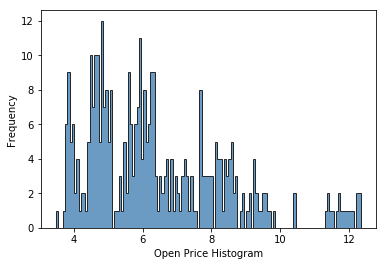

In [9]:
# Histogram plot of the ETC/USD open price
Prices["Open"].plot(kind="hist",bins=136,alpha=0.8,
                     histtype="stepfilled",color="steelblue",
                    edgecolor="black")
plt.xlabel("Open Price Histogram")

### Option 2, 2 histograms.

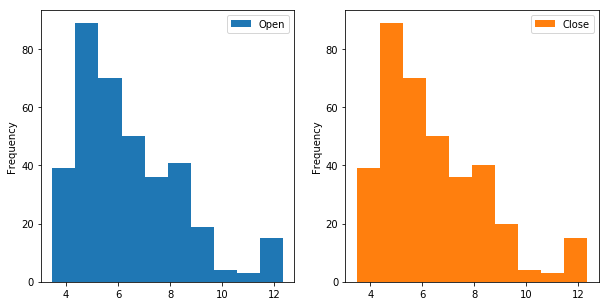

In [10]:
# 2 Histogram plots of the ETC/USD open, close price
Prices.plot.hist(y=['Open','Close'],subplots=True, layout=(1,2),figsize=(10,5));

In [11]:
#  count the number of points in a given bin.
counts, bin_edges = np.histogram(Prices["Close"],bins=5)
print(counts)

[128 120  76  24  18]


## 2D histogram

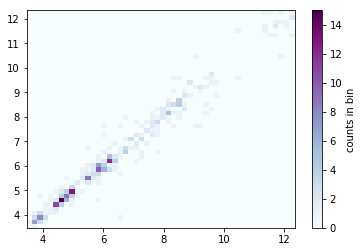

In [12]:
# 2D Histogram of the open and close price etc/usd
x=Prices['Open']
y=Prices['Close']

plt.hist2d(x,y,bins=50,cmap="BuPu")
cb=plt.colorbar()
cb.set_label('counts in bin')

## Hexagonal binnigs 2D Histogram
* With a tesseletion in regular hexagons

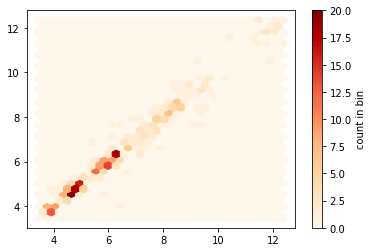

In [13]:
# 2D hexagonal hexbinplot of the open and close price btc/usd
plt.hexbin(x,y,gridsize=30,cmap='OrRd')
cb = plt.colorbar(label='count in bin')
plt.savefig('sun_hexplot.png') # saving the figure

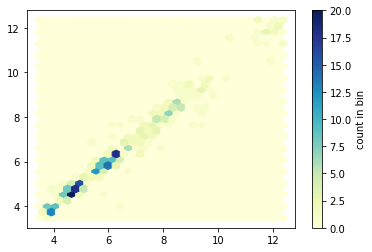

In [14]:
# with different colors
plt.hexbin(x,y,gridsize=30,cmap='YlGnBu')
cb = plt.colorbar(label='count in bin')

## Box plots

Text(0, 0.5, 'USD ')

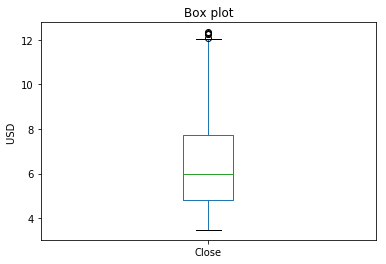

In [15]:
Prices.plot.box(y=['Close'])
plt.title('Box plot')
plt.ylabel('USD ')

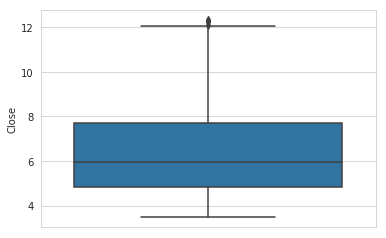

In [16]:
# Make boxplot for one group only
sns.set_style("whitegrid")
sns.boxplot( y=Prices["Close"]);

## Fitting Gauss ditribution

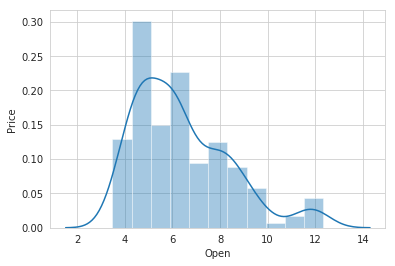

In [40]:
# Distribution plot
sns.distplot(Prices['Open'])
plt.ylabel('Price')
plt.show()

Text(0.5, 0, 'Sepal Length')

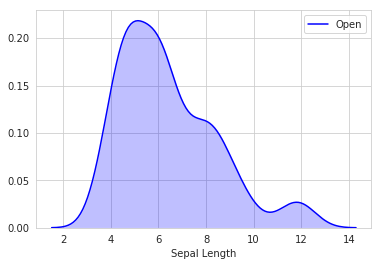

In [51]:
# Plotting the KDE Plot 
sns.kdeplot(Prices['Open'], color='b', shade=True, Label='Open',kernel='gau') 
plt.xlabel('Sepal Length')

In [18]:
Prices.max()

Date          2020-03-31
Open             12.3432
High             13.1486
Low              11.9242
Close            12.3382
Adj Close        12.3382
Volume       4.69924e+09
dtype: object

### Option 2

In [19]:
mean,std=norm.fit(Prices['Open'])

6.406889448087432 2.0060619446053582


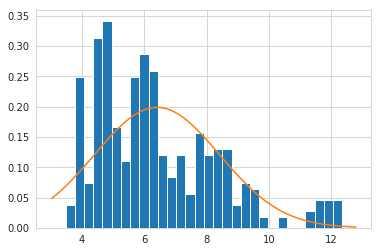

In [53]:
plt.hist(Prices['Open'],bins=30,density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10000)
y=norm.pdf(x,mean,std)
plt.plot(x,y)
print(mean,std)
plt.show()